In [4]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
data = np.loadtxt(open("data/landsat_train.csv", "rb"), delimiter=",")
X_train = data[:,1:]
y_train = data[:,0]
print(X_train.shape)
print(y_train.shape)

(5000000, 9)
(5000000,)


In [5]:
test = np.loadtxt(open("data/landsat_test.csv", "rb"), delimiter=",")
X_test = test
print(X_test.shape)

(9000000, 9)


In [6]:
val = np.loadtxt(open("data/landsat_validation.csv", "rb"), delimiter=",")
X_val = val[:,1:]
y_val = val[:,0]
print(X_val.shape)
print(y_val.shape)

(1335558, 9)
(1335558,)


In [7]:
model = RandomForestClassifier(n_estimators=10, max_features = None)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
score = model.score(X_val, y_val)
print(score)

0.7515839821258231


In [10]:
results = model.predict(X_test)

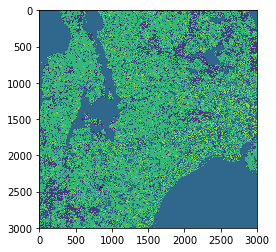

In [15]:
im = results.reshape((3000, 3000))
import matplotlib.pyplot as plt
plt.imshow(im)
#plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier
rands = [np.random.choice(9, 2, replace=False) for i in range(10)]
X_subs = [X_train[:, rc] for rc in rands]
Xv_subs = [X_val[:, rc] for rc in rands]

In [49]:
tree = [DecisionTreeClassifier() for i in range(10)]
for i in range(10):
    print("Training the " + str(i + 1) + " tree")
    (tree[i]).fit(X_subs[i], y_train)


Training the 1 tree
Training the 2 tree
Training the 3 tree
Training the 4 tree
Training the 5 tree
Training the 6 tree
Training the 7 tree
Training the 8 tree
Training the 9 tree
Training the 10 tree


In [50]:
predictions = [tree[i].predict(Xv_subs[i]) for i in range(10)]

In [51]:
preds = np.array(predictions)
preds.shape

(10, 1335558)

In [52]:
from scipy.stats import mode

ms = mode(np.transpose(preds), axis = 1)


In [53]:
guesses = ms[0]

In [54]:
from sklearn.metrics import f1_score
print(f1_score(y_val, guesses, average = 'micro'))

0.6567883985570077
